In [155]:
import warnings
warnings.filterwarnings('ignore')

# data imports
import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # random forest
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
from sklearn.calibration import calibration_curve
# Z, One hot, Stand sclr
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Z-score variables
#poly import
from sklearn.preprocessing import PolynomialFeatures
# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

%matplotlib inline













In [156]:
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streaming.csv")

ama.head()

,gender,age,income,monthssubbed,plan,meanhourswatched,competitorsub,numprofiles,cancelled,downgraded,bundle,kids,longestsession,topgenre,secondgenre,churn
0,woman,38.0,92.29,35,P,9.34,0,1,0.0,0,0,1,130.39,Drama,Thriller,0
1,woman,43.0,63.40,41,P,11.36,0,2,0.0,0,1,1,144.10,Horror,RomanticComedy,0
2,nonbinary,54.0,54.87,59,A,11.82,1,2,0.0,0,0,1,256.46,ScienceFiction,Comedy,1
3,woman,46.0,89.20,41,B,46.89,1,2,1.0,1,1,0,47.66,RomanticComedy,ScienceFiction,1
4,man,42.0,75.61,17,A,39.18,1,2,0.0,0,0,0,137.22,Comedy,Drama,0


In [157]:
#Check Null
ama.isnull().sum()

gender                 0
age                 1993
income              1492
monthssubbed           0
plan                   0
meanhourswatched       0
competitorsub          0
numprofiles            0
cancelled            200
downgraded             0
bundle                 0
kids                   0
longestsession         0
topgenre               0
secondgenre            0
churn                  0
dtype: int64

In [158]:
ama.dropna(inplace = True)
ama.reset_index(inplace = True)

In [159]:
predictors = ["age","income","monthssubbed","meanhourswatched","competitorsub","numprofiles","cancelled","downgraded","bundle","kids","longestsession","gender","plan", "topgenre", "secondgenre"]
contin = ["age","income","monthssubbed","meanhourswatched","competitorsub","numprofiles","cancelled","downgraded","bundle","kids","longestsession"]

In [160]:
X = ama[predictors]
y = ama["churn"]

In [161]:
drop_first=True

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state = 123)



In [163]:
preprocess = make_column_transformer((StandardScaler(), contin),
                            (OneHotEncoder(), ["gender", "plan", "topgenre", "secondgenre"]),
                            remainder = "passthrough")

In [164]:
lr = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1234)
pipe = Pipeline([("pre", preprocess),
         ("logisticalregression", lr)])
gradient = Pipeline([ ("prep", preprocess),
 ("classifier", GradientBoostingClassifier(n_estimators=15, learning_rate=0.2, max_depth=1, random_state=42))
])

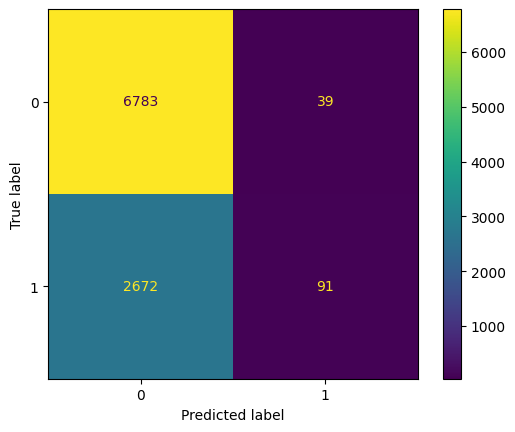

In [165]:
#gradient
gradient.fit(X_train, y_train)
gradient_boosting_train_preds = gradient.predict(X_train)
gradient_boosting_test_preds = gradient.predict(X_test)
gradient_boosting_train_prob = gradient.predict_proba(X_train)[:,1]
gradient_boosting_test_prob = gradient.predict_proba(X_test)[:,1]

print(ConfusionMatrixDisplay.from_predictions(y_test, gradient.predict(X_test)))

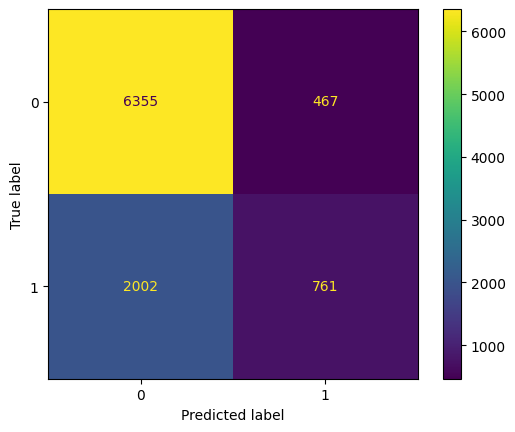

In [166]:
#logistic
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]
print(ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test)))

In [167]:
print("Logistic Regression")
print("Train Acc       : ", accuracy_score(y_train, y_pred_train))
print("Test Acc        : ", accuracy_score(y_test, y_pred_test))
print("Train Prescision: ", precision_score(y_train, y_pred_train))
print("Test Prescision : ", precision_score(y_test, y_pred_test))
print("Train Recall    : ", recall_score(y_train, y_pred_train))
print("Test Recall     : ", recall_score(y_test, y_pred_test))
print("Train ROC AUC   : ", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC AUC    : ", roc_auc_score(y_test, y_pred_test_prob))

print("Gradient Boosting Tree")
print("Train Acc       : ", accuracy_score(y_train, gradient_boosting_train_preds))
print("Test Acc        : ", accuracy_score(y_test, gradient_boosting_test_preds))
print("Train Prescision: ", precision_score(y_train, gradient_boosting_train_preds))
print("Test Prescision : ", precision_score(y_test, gradient_boosting_test_preds))
print("Train Recall    : ", recall_score(y_train, gradient_boosting_train_preds))
print("Test Recall     : ", recall_score(y_test, gradient_boosting_test_preds))
print("Train ROC AUC   : ", roc_auc_score(y_train, gradient_boosting_train_prob))
print("Test ROC AUC    : ", roc_auc_score(y_test, gradient_boosting_test_prob))



Logistic Regression
Train Acc       :  0.7409661600528641
Test Acc        :  0.7424100156494523
Train Prescision:  0.6045072912063633
Test Prescision :  0.6197068403908795
Train Recall    :  0.27682221053057593
Test Recall     :  0.27542526239594645
Train ROC AUC   :  0.7355394376242139
Test ROC AUC    :  0.7384521538489778
Gradient Boosting Tree
Train Acc       :  0.7200987723020207
Test Acc        :  0.7171622326551904
Train Prescision:  0.7623026926648097
Test Prescision :  0.7
Train Recall    :  0.03322675948035129
Test Recall     :  0.0329352153456388
Train ROC AUC   :  0.7160456716998206
Test ROC AUC    :  0.7189982103205943


In [168]:
#RocCurveDisplay.from_predictions(y_train, y_pred_train_prob)

In [169]:
ndata = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingNEW.csv")

favfilms = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/streamingFILMS.csv")
# Create a DataFrame from the CSV file
ndata.dropna(inplace = True)
ndata.reset_index(inplace = True)


X = ndata[predictors]

#print("Number of features in your dataset:", ndata.shape[1])

y_pred_new = pipe.predict(X)

y_pred_new_probability = pipe.predict_proba(X)[:,1]

ndata["churn_probability"] = y_pred_new_probability
#print(ndata.head())
High_Risk_Custys = ndata.nlargest(200, "churn_probability")

feat = ["age", "income", "meanhourswatched"]

z = make_column_transformer((StandardScaler(), feat))
nn = NearestNeighbors(n_neighbors = 10)
films = favfilms[feat]

nnpipe = Pipeline([("z", z), ("model",nn)])
nnpipe.fit(High_Risk_Custys[feat])
similar_users_indices = nn.kneighbors((High_Risk_Custys)[['age', 'income', 'meanhourswatched']], return_distance=False)
High_Risk_Custys['neighbors'] = similar_users_indices.tolist()
print(High_Risk_Custys[['gender', 'age', 'income', 'meanhourswatched', 'neighbors']])



        gender   age  income  meanhourswatched  \
42       woman  26.0   57.69             22.30   
339      woman  20.0   52.05              9.36   
217      woman  69.0   33.62             22.90   
228      woman  28.0   46.20              1.65   
103      woman  39.0   52.25             29.91   
..         ...   ...     ...               ...   
129  nonbinary  58.0   57.80             19.75   
422      woman  21.0   45.43              1.60   
476      woman  39.0   86.32             47.53   
192      woman  69.0   55.10             19.50   
207      other  34.0   63.58             13.53   

                                          neighbors  
42    [182, 181, 64, 142, 57, 100, 33, 63, 86, 114]  
339  [181, 142, 63, 86, 33, 100, 64, 182, 197, 139]  
217     [57, 44, 182, 64, 114, 86, 24, 17, 142, 31]  
228    [181, 142, 86, 63, 139, 89, 114, 67, 33, 96]  
103   [182, 57, 64, 181, 142, 31, 114, 86, 100, 44]  
..                                              ...  
129   [181, 142, 86, 

In [170]:


High_Risk_Custys.to_csv("myfile.csv", index=False)